In [2]:
from deepforest import deepforest
from matplotlib import pyplot as plt
import rasterio as rio
from deepforest import get_data
from rasterio.windows import Window
import numpy as np
from earthpy.spatial import bytescale

Using TensorFlow backend.


In [3]:
test_model = deepforest.deepforest()
test_model.use_release()

Reading config file: C:\software\anaconda3\envs\dforest\lib\site-packages\deepforest\data\deepforest_config.yml
A blank deepforest object created. To perform prediction, either train or load an existing model.
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/v0.2.1 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/v0.2.1

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
test_wv2 = r"D:\projects\smart_cities\gbdx_outputs\055530875010_01_assembly.tif"
with rio.open(test_wv2) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 11613, 'height': 34060, 'count': 8, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.7261128184356602e-05, 0.0, -105.11197299927058,
       0.0, -1.7261128184356602e-05, 40.01393589958559), 'tiled': False, 'interleave': 'band'}


0.0001 1.0


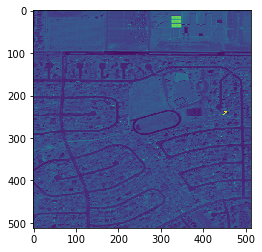

In [5]:
# choose an arbitrary window
min_col = 5000
min_row = 4000
num = 512
with rio.open(test_wv2) as src:
    w = src.read(window=Window(min_col, min_row, num, num))
    w = w/10000 #using surface reflectance, divide by 10000
    
print(w.min(), w.max())
plt.imshow(w[5])

In [6]:
raw_arr = np.rollaxis(w[[1,2,4], :, :], 0, 3) #get images into b-g-r format using WV2's channel spec
raw_arr = bytescale(raw_arr) # make to range 0-255
pred = test_model.predict_image(raw_image=raw_arr, color=[0,0,255])

C:\software\anaconda3\envs\dforest\lib\site-packages\deepforest\deepforest.py:268: UserWarning: Input image has a size of (512, 512), but the release model was trained on crops of 400px x 400px, results may be poor.Use predict_tile for dividing large images into overlapping windows.
  "Use predict_tile for dividing large images into overlapping windows.".format(raw_image.shape[:2]))


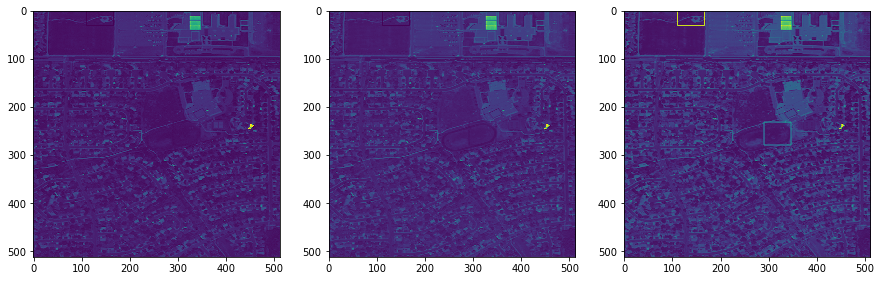

In [7]:
fig, axes = plt.subplots(1,3,figsize=(15,10))
for i in range(3):
    axes[i].imshow(pred[:,:,i])

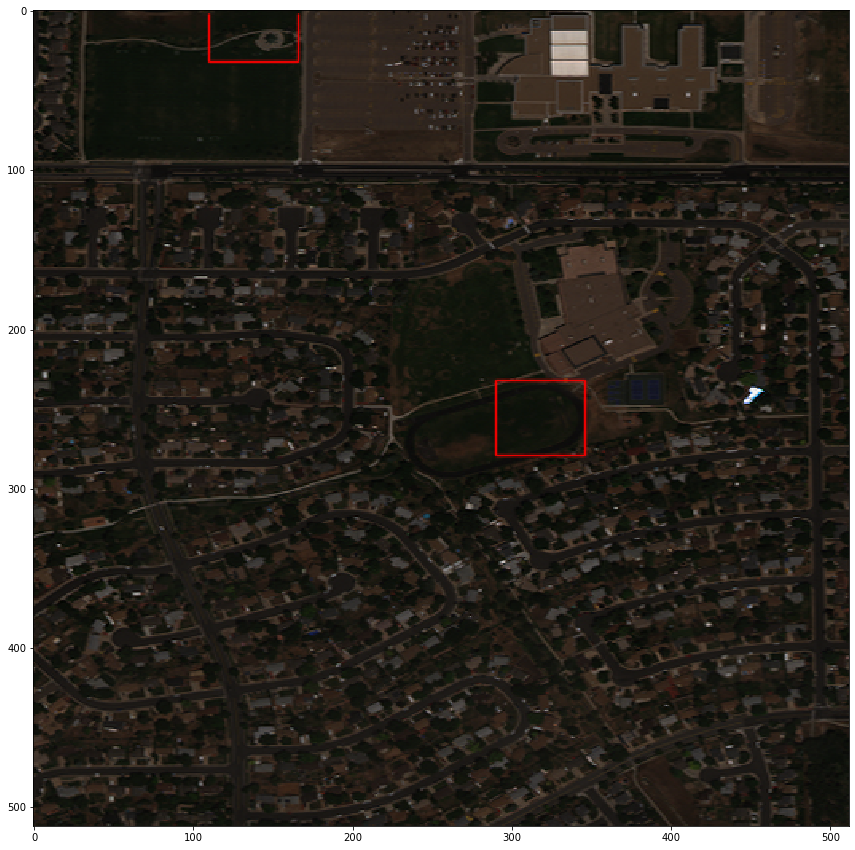

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(pred[...,::-1])

Use windows

In [9]:
from deepforest import preprocess

In [24]:
windows = preprocess.compute_windows(raw_arr, patch_size=40,patch_overlap=0.1)

In [25]:
index=0
crop = raw_arr[windows[index].indices()]

In [26]:
prediction = test_model.predict_image(raw_image = crop,return_plot=True, color=[0,0,255])

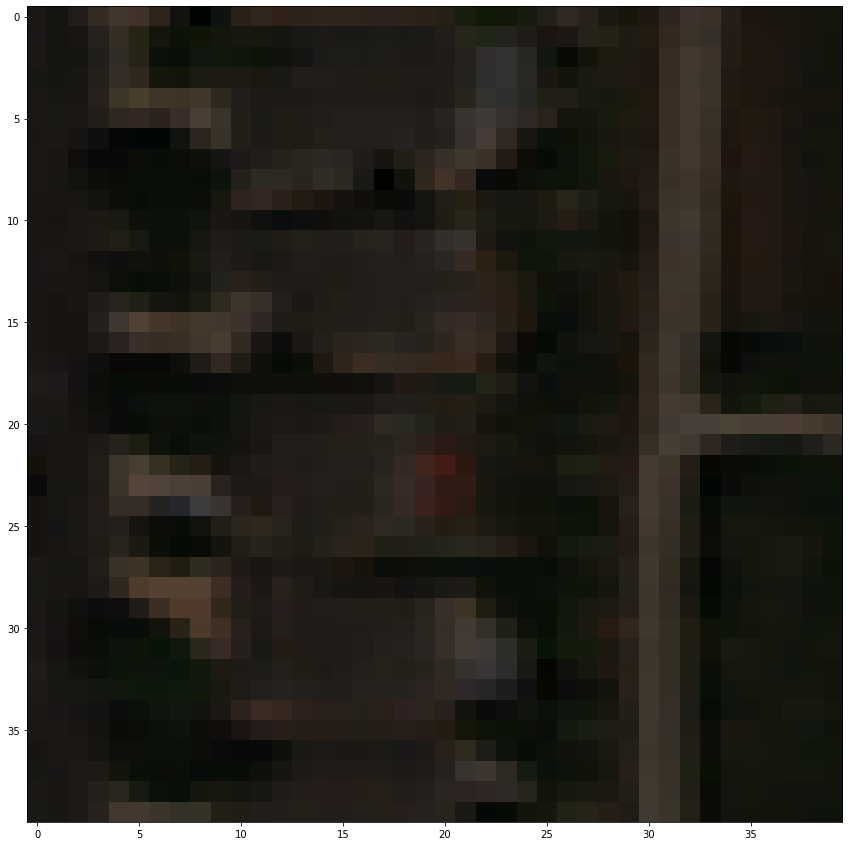

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(prediction[...,::-1])

In [28]:
prediction_df = test_model.predict_image(raw_image = crop,return_plot=False, color=[0,0,255])
prediction_df

,xmin,ymin,xmax,ymax,score,label
